<a href="https://colab.research.google.com/github/SrikanthGuggila/INeuron/blob/main/Matplotlib.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. We have the min and max temperatures in a city In India for each months of the year.
We would like to find a function to describe this and show it graphically, the dataset
given below.


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
data = pd.DataFrame({'Month' : [1,2,3,4,5,6,7,8,9,10,11,12],
                    'Max': [39, 41, 43, 47, 49, 51, 45, 38, 37, 29, 27, 25],
                    'Min': [21, 23, 27, 28, 32, 35, 31, 28, 21, 19, 17, 18]})

In [ ]:
data

,Month,Max,Min
0,1,39,21
1,2,41,23
2,3,43,27
3,4,47,28
4,5,49,32
5,6,51,35
6,7,45,31
7,8,38,28
8,9,37,21
9,10,29,19


In [ ]:
data.shape

(12, 3)

In [ ]:
data.info

<bound method DataFrame.info of     Month  Max  Min
0       1   39   21
1       2   41   23
2       3   43   27
3       4   47   28
4       5   49   32
5       6   51   35
6       7   45   31
7       8   38   28
8       9   37   21
9      10   29   19
10     11   27   17
11     12   25   18>

In [ ]:
Max = np.array(data['Max'])
Min = np.array(data['Min'])
Month = np.array(data['Month'])


Text(0, 0.5, 'Temperature')

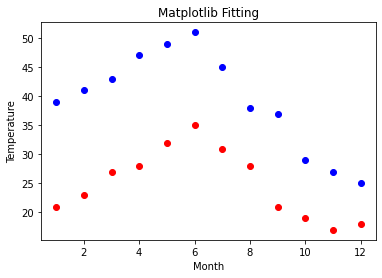

In [ ]:
ax=plt.gca()
ax.scatter(x=Month,y=Max,color='blue')
ax.scatter(x=Month,y=Min,color='red')
plt.title('Matplotlib Fitting')
plt.xlabel('Month')
plt.ylabel('Temperature')

In [ ]:
from scipy import optimize
def temps(times, avg, ampl, time_offset):
    return (avg + ampl * np.cos((times + time_offset) * 1.8 * np.pi / times.max()))
res_max, cov_max = optimize.curve_fit(temps, Month, Max)
res_min, cov_min = optimize.curve_fit(temps, Month, Min)

In [ ]:
res_max

array([38.3189759 , 11.40523793, -4.93454518])

In [ ]:
res_min

array([24.20132861, -8.13512334,  1.17137921])

In [ ]:
days = np.linspace(0, 12, num=365)

Text(0, 0.5, 'Temperature ($^\\circ$C)')

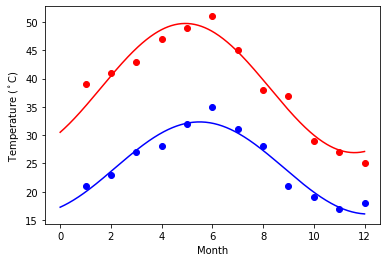

In [ ]:
plt.figure()
ax = plt.gca()
ax.scatter(x=Month, y=Max, color = 'red')
ax.plot(days, temps(days, *res_max), color = 'red')
ax.scatter(x=Month, y=Min, color = 'blue')
ax.plot(days, temps(days, *res_min), color = 'blue')
plt.xlabel('Month')
plt.ylabel('Temperature ($^\circ$C)')

2. This assignment is for visualization using matplotlib:
data to use:
url=https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_original.csv
titanic = pd.read_csv(url)
Charts to plot:
  1. Create a pie chart presenting the male/female proportion
  2. Create a scatterplot with the Fare paid and the Age, differ the plot color by gender

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
url="https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_original.csv"

In [ ]:
data = pd.read_csv(url)

In [ ]:
data.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


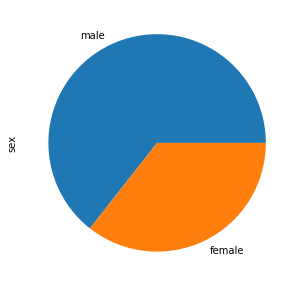

In [ ]:
plt.figure(figsize=(5,5))
data.sex.value_counts().plot(kind='pie')

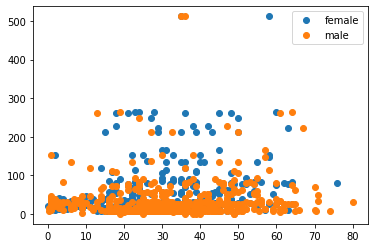

In [ ]:
groups = data.groupby("sex")
for name, group in groups:
    plt.plot(group["age"], group["fare"], marker="o", linestyle="", label=name)
plt.legend()